# View controller

View control for searchers launched in s1_ridge_trials.ipynb.

### Searcher monitoring

In [1]:
%reset -f
from search import ridge

# list active searchers
ridge.search_status(smln_id='smln_1', recent=30)

0 searchers active in last 30 s.

The following searchers were suspended by errors:

Look up error tracebacks using read_search_error(id).



In [2]:
# read optional error message
ridge.read_search_error(searcher_id=9)

No error found in searcher 9.


### Results scatter plot

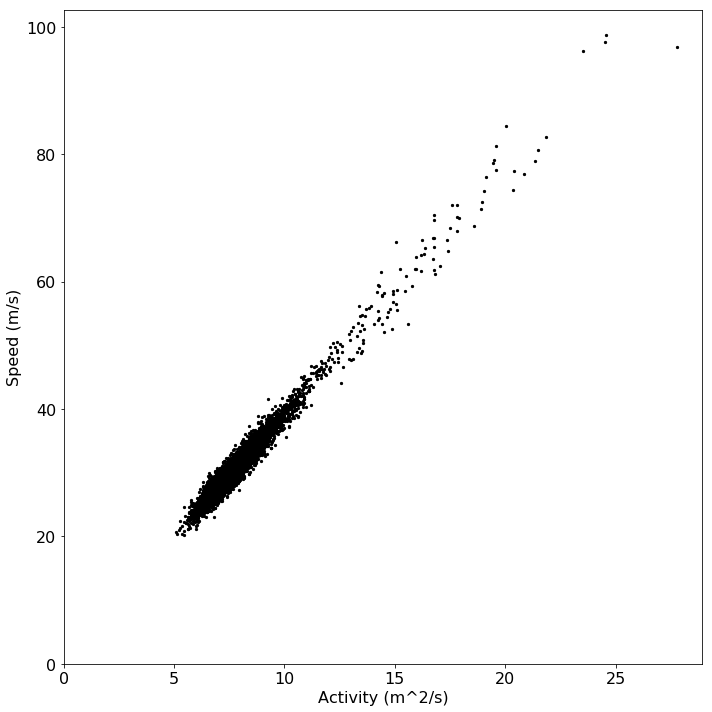

In [1]:
%reset -f
%matplotlib inline

import aux
from db.d_models import RidgeTrial as T
from search import ridge_viz

import PARAMETERS as P
from search import ridge_global as C


pre = {
    'w_n_pc_ec_vs_dist': aux.load(C.PATH_W_N_PC_EC_VS_DIST),
    'v_g_n_vs_w_n_pc_ec_fr_ec': aux.load(C.PATH_V_G_N_VS_W_N_PC_EC_FR_EC)
}

ridge_viz.rslt_scatter(
    smln_id='smln_1',
    filt=[T.stability > 0.5, T.activity < 30, T.speed < 100],
    lmt=10000, c='k', s=5);

### Fast trial lookup

In [2]:
ridge_viz.select_trials(
    smln_id='smln_1',
    filt=[T.stability > 0.5, T.speed < 30], order_by='speed', lmt=15
    )[['id', 'activity', 'speed']]

,id,activity,speed
0,55872,5.468186,20.241767
1,45386,5.127435,20.363982
2,55615,5.363594,20.399904
3,53985,5.071357,20.650492
4,42493,5.448666,20.816708
5,43261,5.219313,20.948571
6,45644,5.622595,21.086395
7,54135,5.974448,21.207265
8,47339,5.650618,21.218034
9,42197,5.270632,21.271540


### Example trials

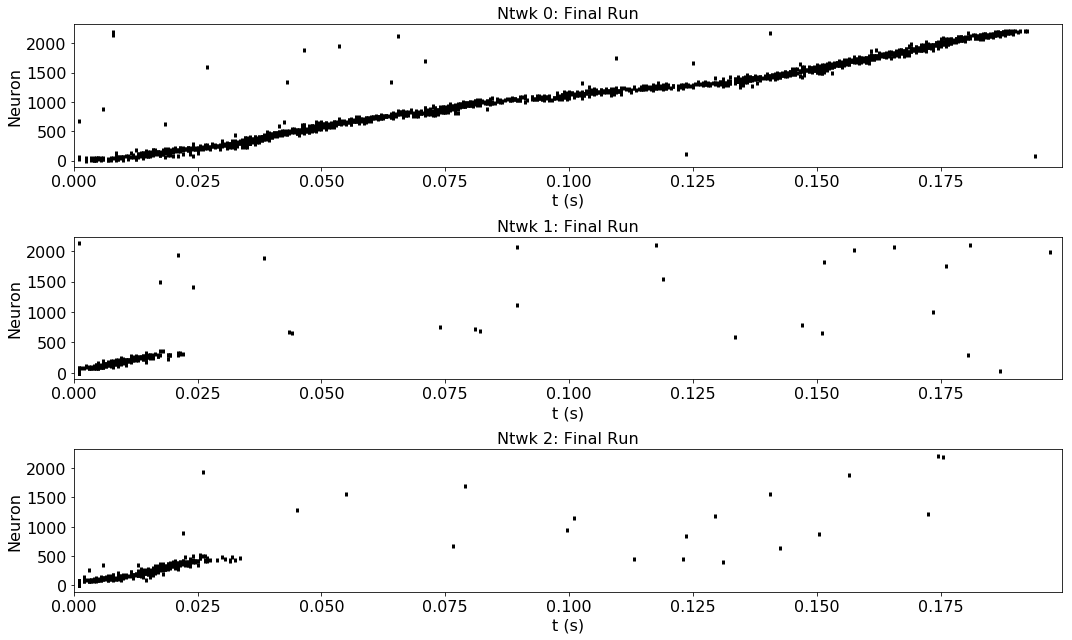

In [5]:
ridge_viz.raster(53985, pre, C, P, ax_height=3, colors=None);

### Parameter analysis

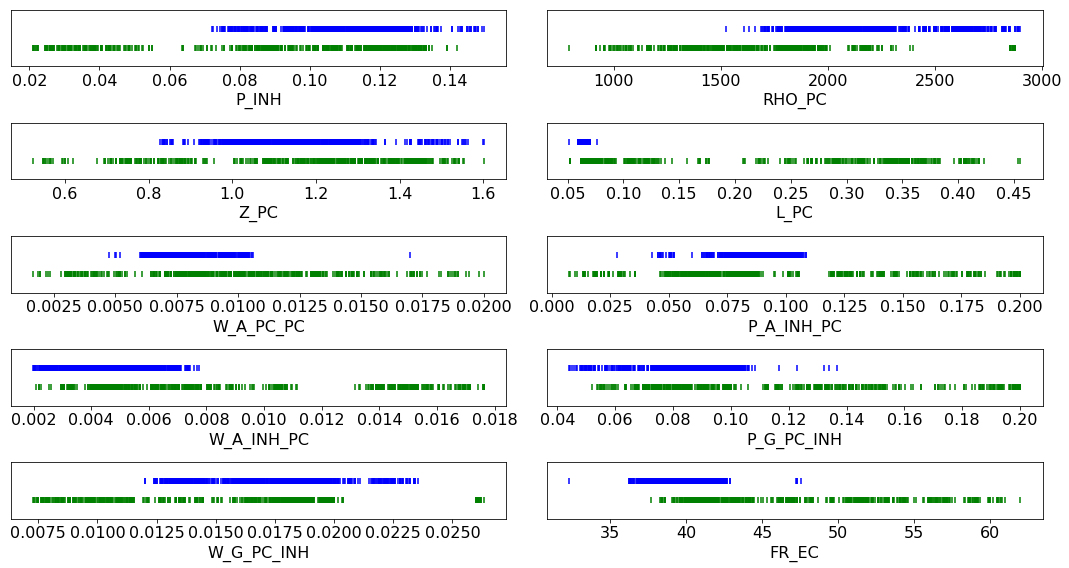

In [8]:
ridge_viz.trial_set_scatter(
    smln_id='smln_1',
    filts=[
        [T.stability > 0.5, T.speed < 30],
        [T.stability > 0.5, T.speed >= 40],
    ], cs=('b', 'g'), lmt=1000, s=30, marker='|', seed=0);